# import statements


In [5]:
import cv2
import numpy as np
import random
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt


# draw junctions


In [6]:
#in a circular region randomly place connection point of the junction
def non_uniform_distribution_circle(r, x, y):
    r = r*random.random()
    theta = 2*np.pi*random.random()
    return int(x+r*np.cos(theta)), int(y+r*np.sin(theta))


#draw the junctions based on x and y, randomly select which junction
def draw_t_junction(size, x_center, y_center):
    image = np.zeros((size, size, 3), dtype=np.uint8)
    t =2
    rand_junc = random.randint(0,8)

    junction_lst = [[0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]]
    junction = junction_lst[rand_junc]
    # Draw vertical line
    #cv2.line(image, start_point, end_point, color, thickness) 
    if junction[0]==1:
        cv2.line(image, (x_center,y_center), (x_center,size), (255, 255, 255), thickness=t) #Top
    if junction[1]==1:
        cv2.line(image, (x_center,y_center), (x_center,0), (255, 255, 255), thickness=t) #bottom
    if junction[2]==1:
        cv2.line(image, (x_center,y_center), (0,y_center), (255, 255, 255), thickness=t) #left
    if junction[3]==1:
        cv2.line(image, (x_center,y_center), (size,y_center), (255, 255, 255), thickness=t)#right
    # Draw horizontal line at the middle
    # Apply Gaussian blur for smoothing
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust kernel size as needed
    return blurred_image

def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to an image.
    :param image: Input image.
    :param mean: Mean of the Gaussian noise.
    :param sigma: Standard deviation of the Gaussian noise.
    :return: Noisy image.
    """
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure the values are within range
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

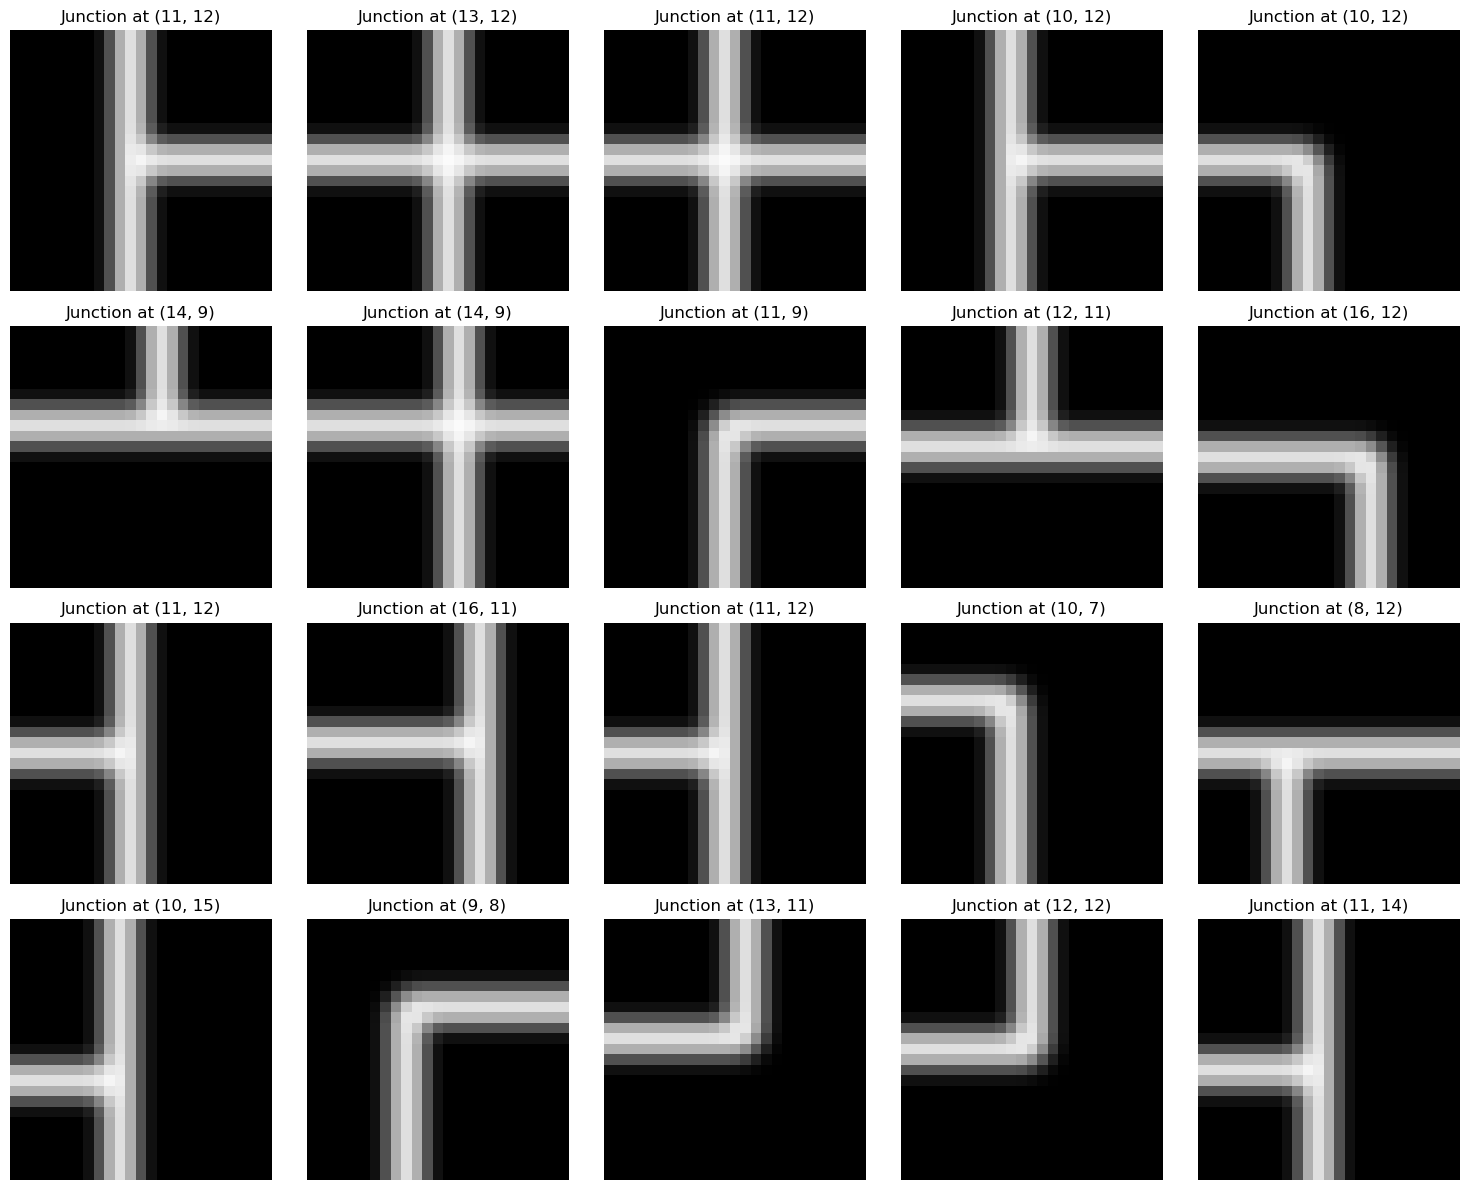

In [7]:

size = 25  # Size of the junction images

fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
axs = axs.ravel()

for i in range(20):
    x, y = non_uniform_distribution_circle(5, 12,12)
    # print(x,y)
    # t_junction_img = draw_t_junction(size)
    t_junction_img = draw_t_junction(size, x, y)

    # Save or display images
    cv2.imwrite('t_junction.jpg', t_junction_img)
    axs[i].imshow(cv2.cvtColor(t_junction_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Junction at ({x}, {y})")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


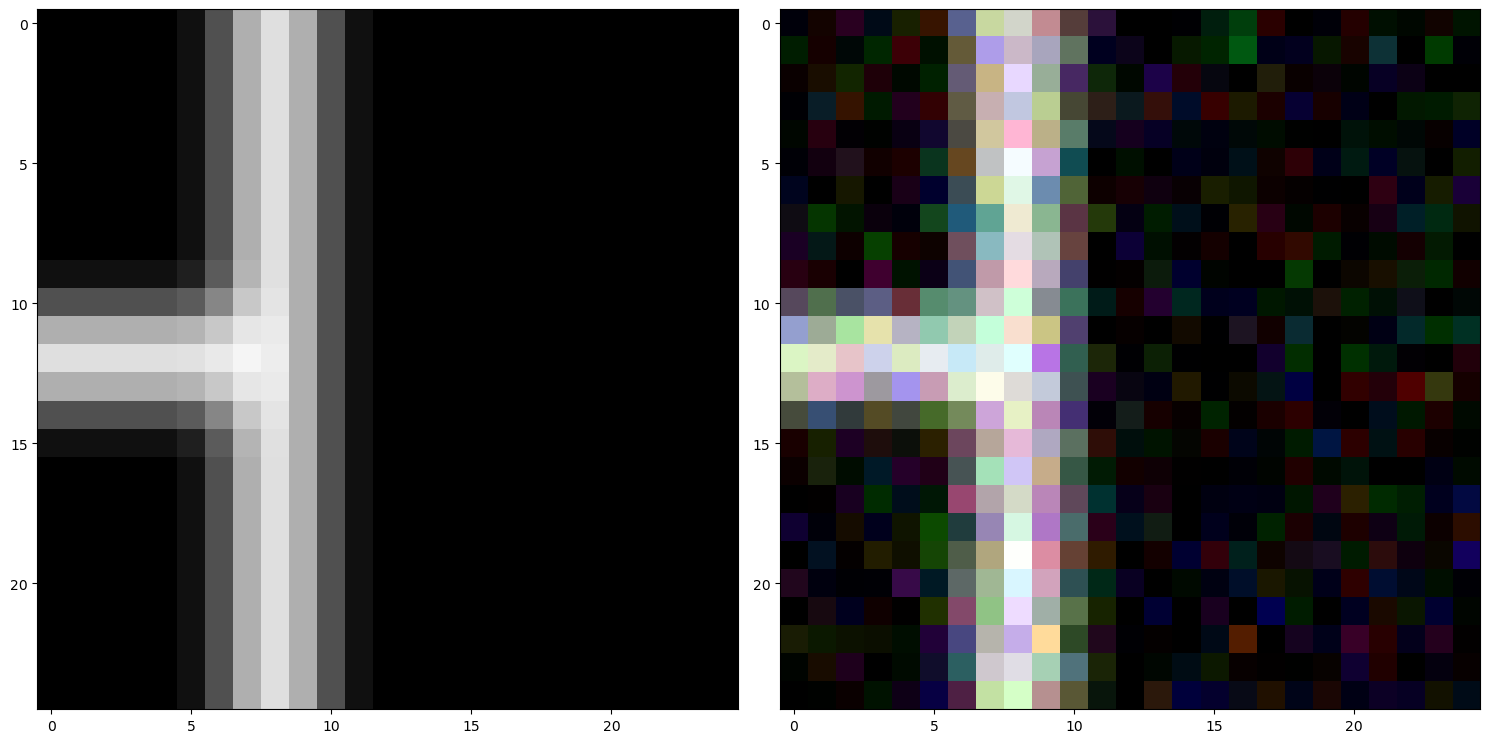

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))  # To show 20 images in a grid
axs = axs.ravel()

x, y = non_uniform_distribution_circle(5, 12,12)
original_img = draw_t_junction(size, x, y)
noisy_img = add_gaussian_noise(original_img)


 # Save or display images
cv2.imwrite('t_junction.jpg', original_img)
axs[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

 # Save or display images
cv2.imwrite('t_junction.jpg', noisy_img)
axs[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()